## Outlier Decteion Techniques

There are several types of outlier detection methods, and the choice of method will depend on the data and the specific problem at hand. Here are some of the most common types of outlier detection methods:

Statistical Methods: These methods are based on statistical models and assumptions, such as the mean, median, and standard deviation. Outliers are detected by computing these statistics and identifying observations that deviate significantly from them.

Distance-Based Methods: These methods compute the distance between each observation and its nearest neighbors. Observations that are significantly farther away than the others are considered outliers.

Density-Based Methods: These methods identify outliers based on their location in a density plot. Observations that fall in low-density regions are considered outliers.

Clustering-Based Methods: These methods use clustering algorithms to group observations into clusters. Observations that do not belong to any cluster or belong to a small cluster are considered outliers.

Machine Learning-Based Methods: These methods use various machine learning algorithms, such as neural networks and support vector machines, to learn the normal patterns in the data and identify observations that do not fit these patterns.

It is worth noting that no single method is universally applicable, and the choice of method will depend on the nature of the data and the specific problem at hand.

Here are some of the Outlier based techniques we'll cover in this notebook

1. IQR (Inter Quantile Range)
2. Z-Score Technique
3. Elliptical Envelope
4. Isolation Forest
5. Local Outlier Factor

#### IQR (Inter Quantile Range)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings as war
war.filterwarnings('ignore')

In [6]:
import random 


random.randrange(1,1000)

35

In [39]:
#Generating the data

# Create a random dataframe with 5 columns and 100 rows
np.random.seed(42)
df = pd.DataFrame(np.random.randn(10000, 5), columns=['A', 'B', 'C', 'D', 'E'])

# Add some outliers
df.iloc[0, 0] = 1000   # A very large value in column A
df.iloc[1, 1] = -1000  # A very small value in column B
df.iloc[2, 2] = 200    # A large value in column C
df.iloc[3, 3] = -200   # A small value in column D
df.iloc[4, 4] = np.nan # A missing value in column E

# Print the dataframe
print(df)

                A            B           C           D         E
0     1000.000000    -0.138264    0.647689    1.523030 -0.234153
1       -0.234137 -1000.000000    0.767435   -0.469474  0.542560
2       -0.463418    -0.465730  200.000000   -1.913280 -1.724918
3       -0.562288    -1.012831    0.314247 -200.000000 -1.412304
4        1.465649    -0.225776    0.067528   -1.424748       NaN
...           ...          ...         ...         ...       ...
9995    -1.153965     0.265739   -0.192730    1.527117 -2.505187
9996     0.040727     0.433389    0.897684    0.143323  0.364795
9997     0.176032     0.439752   -0.019282    2.116179  0.577845
9998     0.197389    -0.738124   -0.342293    1.510120 -2.484976
9999     0.056799    -0.024923    0.500085    0.265215  1.515811

[10000 rows x 5 columns]


<Axes: xlabel='D', ylabel='Density'>

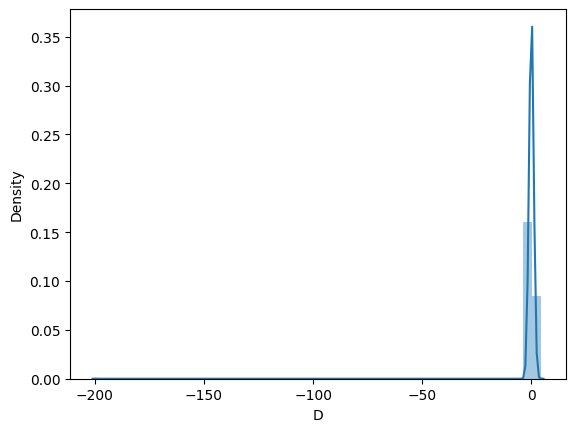

In [40]:
sns.distplot(df['D'])

In [33]:
data = df['E'].dropna().values


In [35]:
Q1 = np.quantile(data,0.25)
Q3 = np.quantile(data,0.75)

IQR = Q3 - Q1

print(IQR)

1.4087064825284892


In [36]:
Lower_limit = Q1 - 1.5*IQR
Upper_limit = Q3 + 1.5*IQR

In [37]:
ans = []

for i in range(len(data)):

    if data[i] < Lower_limit:
        ans.append(data[i])
    
    if data[i] > Upper_limit:
        ans.append(data[i])

print(ans)

[3.8527314906547208]


## Z-Score Technique

In [42]:
# Generate normal distribution 

# Generate a normal distribution with mean=0 and std=1
np.random.seed(42)
data = np.random.normal(0, 1, 1000)

# Introduce some outliers
outliers = np.random.choice(1000, size=20, replace=False)
data[outliers] = np.random.normal(10, 5, size=20)

# Convert to pandas series
data = pd.Series(data)

# Print the first 10 observations
print(data.head(10))

0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
5   -0.234137
6    1.579213
7    0.767435
8   -0.469474
9    0.542560
dtype: float64


<Axes: ylabel='Density'>

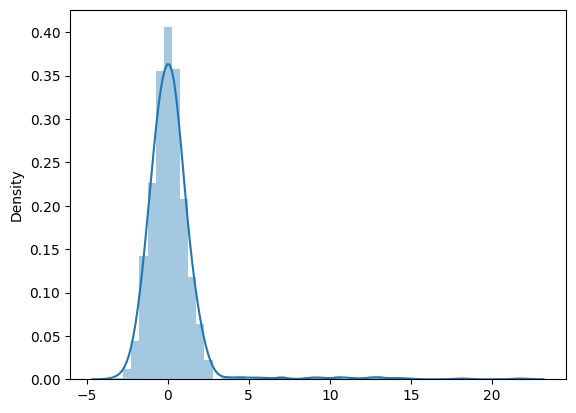

In [43]:
sns.distplot(data)

In [51]:
# Standadise all values to z-scores

z_values = []
for i in range(len(data)):
    z_values.append((data[i] - data.mean())/data.std())

In [79]:
z_values = np.array(z_values)

z_values_mod = z_values[(z_values < 2.8) & (z_values > -2.8)]

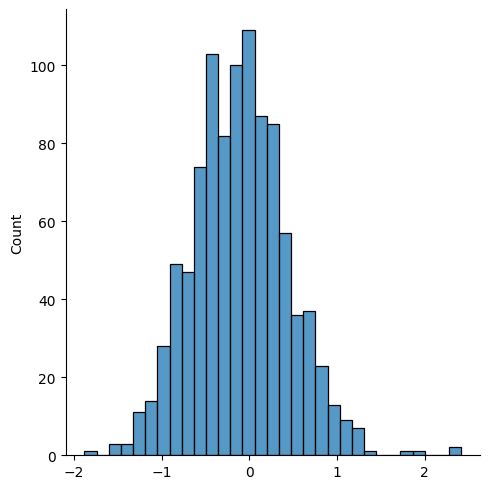

In [80]:
sns.displot(z_values_mod)